
# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [0]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
# Load the file as a dataframe 
df = pd.read_csv("train.csv")
movies = pd.read_csv("moviesData.csv")

In [243]:
# Print the first ten rows of df
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [244]:
# Print the first five rows of MonthlyRate
df['MonthlyRate'][0:5]

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [245]:
# Find the details of MonthlyRate 
#df['MonthlyRate'].describe()
df.MonthlyRate.describe()


count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [246]:
# Check for missing values 
df.isna().sum()

# Drop the missing values 
df = df.dropna()


# Print the size of df after dropping 
print(df.shape)


(1028, 34)


### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [247]:
# Add a column named MonthRateNew
mean=df.MonthlyRate.mean()
std=df.MonthlyRate.std()
df['MonthlyRateNew']=(df['MonthlyRate']-mean)/std
print(df.MonthlyRateNew)



0       0.742749
1       1.512813
2      -1.680795
3       1.264827
4       0.338849
          ...   
1023   -0.531941
1024    1.767609
1025    0.137254
1026    1.290930
1027   -1.494663
Name: MonthlyRateNew, Length: 1028, dtype: float64


### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [258]:
#movies.shape

# Check for missing values 
x=movies.isna().sum()
print(x)
# Drop the missing values
#movies=movies.dropna() 
#movies.shape

# Replace the missing values 
mean=movies.mean()
#print(mean)
movies=movies.fillna(mean)
#movies.head()

# You can use SimpleImputer of sklearn for this



Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              0
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         0
dvd_rel_month        0
dvd_rel_day          0
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64


---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8029ebf28>]],
      dtype=object)

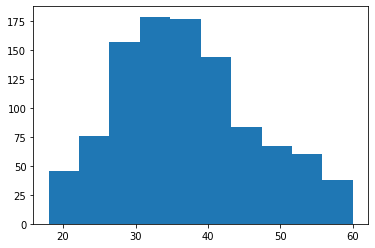

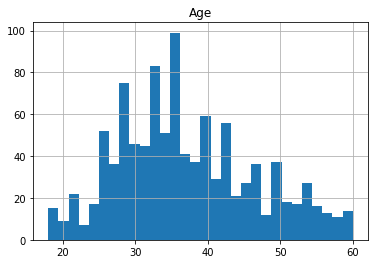

In [249]:
# Plot and modify the histogram of Age
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df.Age)
df.hist(column='Age',bins=30)




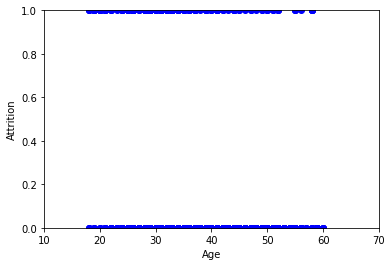

In [250]:
# Draw a scatter plot between Age and Attrition
plt.scatter(df.Age, df.Attrition,c='blue')
plt.xlabel("Age")
plt.ylabel("Attrition")
plt.xlim(10,70)
plt.ylim(0,1)
plt.show()


### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

172


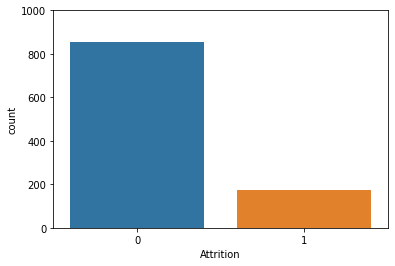

In [251]:
# Get a series of counts of values of Attrition
count=0
for i in range(0,1028):
    if df.Attrition[i]==1:
        count=count+1
print(count)



# Draw a countplot for Attrition 
sns.countplot(x="Attrition",data=df)
plt.ylim(0,1000)
plt.show()

# You may use countplot of seaborn for this 



### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

Text(0, 0.5, 'No of Attrition')

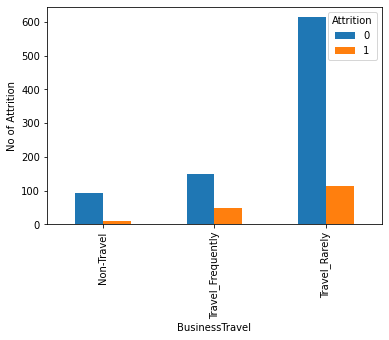

In [252]:
# Draw a cross tab of Attritiona and BusinessTravel 
pd.crosstab(df.BusinessTravel,df.Attrition).plot(kind='bar')
plt.ylabel("No of Attrition")
# You may use crosstab of pandas for this 



### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

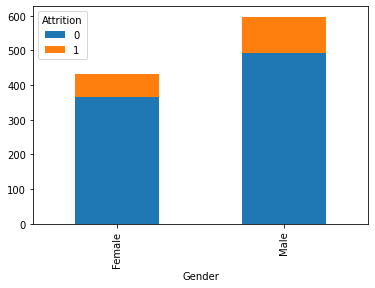

In [253]:
# Draw a stacked bar chart between Attrition and Gender 
pd.crosstab(df.Gender,df.Attrition).plot(kind='bar',stacked=True)


### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

(array([ 65.,  24.,  32., 108.,  87.,  54., 140., 133.,  19.,  61.,  17.,
         21.,  53.,  20.,  15.,  47.,  20.,  16.,  21.,  13.,   2.,  17.,
          6.,   9.,  14.,   3.,   1.,   7.,   1.,   2.]),
 array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
         6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
        13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
        20.        , 21.33333333, 22.66666667, 24.        , 25.33333333,
        26.66666667, 28.        , 29.33333333, 30.66666667, 32.        ,
        33.33333333, 34.66666667, 36.        , 37.33333333, 38.66666667,
        40.        ]),
 <a list of 30 Patch objects>)

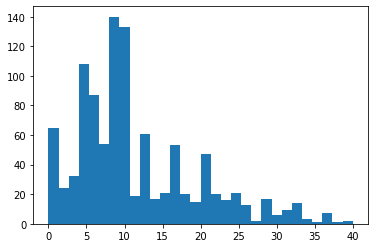

In [254]:
# Draw a histogram of TotalWorkingYears with 30 
plt.hist(df.TotalWorkingYears,bins=30)







(array([156.,  84.,  93., 202.,  57.,  62., 121.,  78.,  23.,  24.,  10.,
         12.,  16.,  11.,   9.,  31.,   9.,   0.,  10.,   3.,   2.,   2.,
          0.,   3.,   6.,   1.,   0.,   2.,   0.,   1.]),
 array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
         6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
        13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
        20.        , 21.33333333, 22.66666667, 24.        , 25.33333333,
        26.66666667, 28.        , 29.33333333, 30.66666667, 32.        ,
        33.33333333, 34.66666667, 36.        , 37.33333333, 38.66666667,
        40.        ]),
 <a list of 30 Patch objects>)

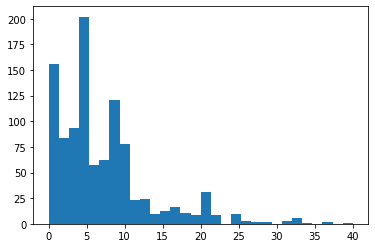

In [255]:
# Draw a histogram of YearsAtCompany
plt.hist(df.YearsAtCompany,bins=30)


### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


[Text(0, 0, 'Sales'),
 Text(0, 0, 'Research & Development'),
 Text(0, 0, 'Human Resources')]

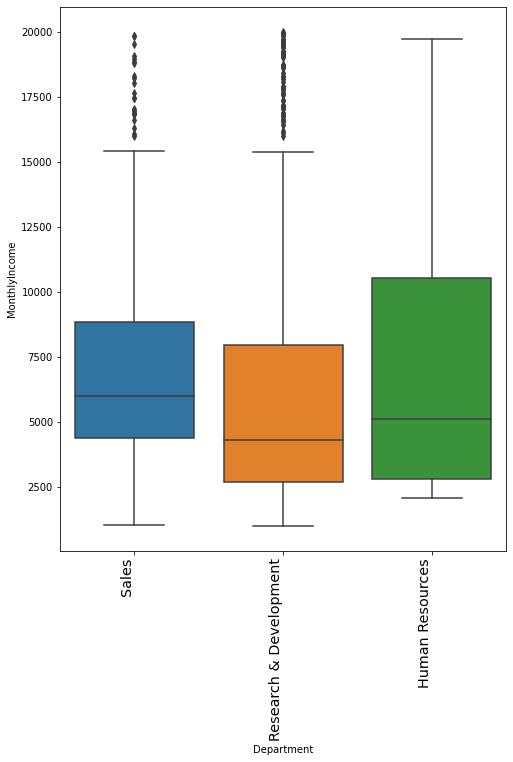

In [256]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
plt.figure(figsize=(8,10))
chart=sns.boxplot('Department','MonthlyIncome',data=df)
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
) 

### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

Sales Executive              223
Research Scientist           209
Laboratory Technician        183
Manufacturing Director       105
Healthcare Representative     85
Manager                       79
Research Director             59
Sales Representative          57
Human Resources               28
Name: JobRole, dtype: int64


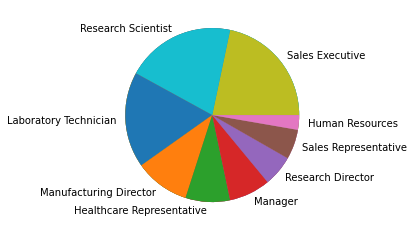

In [257]:
# Create a piechart of JobRole 

# You will need to find the counts of unique values in JobRole. 

JobRole_counts=df.JobRole.value_counts()
print(JobRole_counts)
plt.pie(JobRole_counts)
plt.pie(JobRole_counts)
plt.pie(JobRole_counts,labels=JobRole_counts.index.tolist())
plt.show()

